# Machine Learning

## Imports

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from ipywidgets import interact, fixed
import seaborn as sns
import sklearn as sk
import sklearn.naive_bayes as nb
from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

## Load and prepare the data

Read the pickled `DataFrame` that shows consumer profiles, consumer cuisines, restaurant profiles, restaurant cuisines, and user ratings of restaurants

In [2]:
user_restaurant_ratings = pd.read_pickle('user_restaurant_ratings_modeling')

Prepare your data for machine learning:

* Create a `DataFrame` for your features named `X` with a subset of columns that you think will be useful in predicting restaurant ratings.
* Create a `Series` for your target variable named `y` from the `rating` column.

In [3]:
y = user_restaurant_ratings.rating
X = user_restaurant_ratings.drop('rating', axis=1)

## Train/test split

Use `sklearn.cross_validation.train_test_split` to split your data into a training and test set. Save the resulting data in the variables:

* `Xtrain`
* `Xtest`
* `ytrain`
* `ytest`

In [4]:
Xtrain, Xtest, ytrain, ytest = sk.cross_validation.train_test_split(X, y)

Here are the shapes of the resulting arrays

In [5]:
Xtrain.shape, ytrain.shape

((654, 49), (654,))

In [6]:
Xtest.shape, ytest.shape

((219, 49), (219,))

## Gaussian Naive-Bayes classifier

Perform the following steps with the `sklearn.naive_bayes.GaussianNB` classifier:

1. Instantiate the model class
2. Fit the model with the training data
3. Use the model to make predictions about the test data

In [7]:
clf = nb.GaussianNB()
clf.fit(Xtrain, ytrain)
prediction = clf.predict(Xtest)
clf.score(Xtest, ytest)

0.38812785388127852

Use `sklearn.metrics.confusion_matrix` and Seaborn's `heatmap` to display the confusion matrix for this model:

[[21  8 15]
 [43 27 12]
 [42 14 37]]


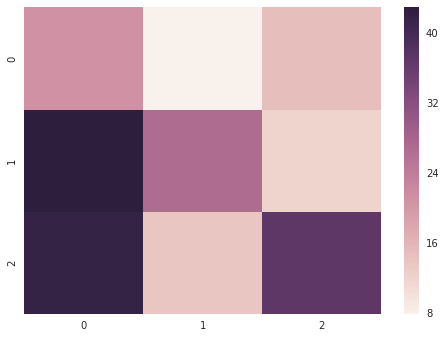

In [8]:
print(confusion_matrix(ytest, prediction))
sns.heatmap(confusion_matrix(ytest, prediction));

## Random Forest Classifier

Perform the following steps with the `sklearn.ensemble.RandomForestClassifier` classifier:

1. Instantiate the model class
2. Fit the model with the training data
3. Use the model to make predictions about the test data

In [9]:
clf_rf = RandomForestClassifier()
clf_rf.fit(Xtrain, ytrain)
prediction_rf = clf_rf.predict(Xtest)
clf_rf.score(Xtest, ytest)

0.57077625570776258

[[21 14  9]
 [ 6 49 27]
 [10 28 55]]


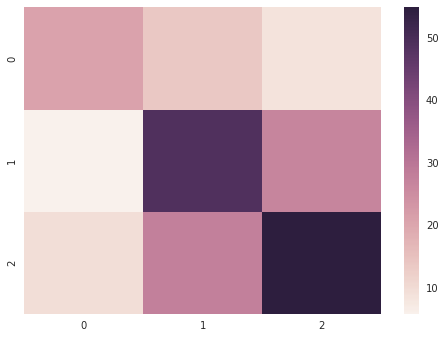

In [10]:
print(confusion_matrix(ytest, prediction_rf))
sns.heatmap(confusion_matrix(ytest, prediction_rf));

In [11]:
clf_rf.feature_importances_

array([ 0.01654859,  0.07640722,  0.09473844,  0.0792741 ,  0.02693718,
        0.01471792,  0.02563681,  0.02593096,  0.00242308,  0.02264383,
        0.01919765,  0.02346726,  0.02322645,  0.01484753,  0.0143323 ,
        0.00984283,  0.00838491,  0.00489686,  0.01608861,  0.01609013,
        0.00779512,  0.01543822,  0.01232176,  0.0176549 ,  0.00716461,
        0.00683965,  0.00627215,  0.00476624,  0.00241839,  0.01956325,
        0.01559618,  0.01420561,  0.03525845,  0.02968345,  0.04193011,
        0.03195134,  0.00383681,  0.00930361,  0.02251608,  0.008876  ,
        0.00155954,  0.01632208,  0.02120478,  0.03181657,  0.03137621,
        0.01139458,  0.00658084,  0.01482105,  0.01589981])

## Logistic Regression

Perform the following steps with the `sklearn.linear_model.LogisticRegression` classifier:

1. Instantiate the model class
2. Fit the model with the training data
3. Use the model to make predictions about the test data

In [12]:
clf_logreg = LogisticRegression()
clf_logreg.fit(Xtrain, ytrain)
prediction_logreg = clf_logreg.predict(Xtest)
clf_logreg.score(Xtest, ytest)

0.48858447488584472

[[ 8 15 21]
 [ 5 33 44]
 [ 1 26 66]]


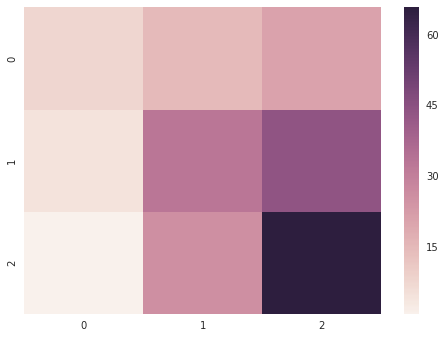

In [13]:
print(confusion_matrix(ytest, prediction_logreg))
sns.heatmap(confusion_matrix(ytest, prediction_logreg));

## The Customer Satisfaction Prediction Tool

Plug in a consumer profile and a restaurant profile to predict customer satisfaction! Plug in a consumer profile and a restaurant profile to predict customer satisfaction! Consumer attributes are prefixed `u_`. Restaurant attributes are prefixed `r_`.

Rating System:
* 0 - poor
* 1 - average
* 2 - great

In [14]:
test = X.loc[0]
def customer_satisfaction_prediction(u_height, u_weight, u_smoker=0, u_drink_level=0, 
                                     u_dress_preference=0, u_ambience=0, u_birth_year=0, 
                                     u_interest=0, u_personality=0, u_activity=0, 
                                     u_budget=0, r_alcohol=0,
                                     r_smoking_area=0, r_dress_code=0, r_price=0, 
                                     r_ambience=0, r_franchise=0, r_area=0):
    for i in test.keys():
        test[i] = 0
    test['height'] = u_height
    test['weight'] = u_weight
    test['smoker'] = u_smoker
    test[u_drink_level] = 1
    test[u_dress_preference] = 1
    test[u_ambience] = 1
    test['birth_year'] = u_birth_year
    test[u_interest] = 1
    test[u_personality] = 1
    test[u_activity] = 1
    test[u_budget] = 1
    test[r_alcohol] = 1
    test[r_smoking_area] = 1
    test[r_dress_code] = 1
    test[r_price] = 1
    test[r_ambience] = 1
    test['franchise'] = r_franchise
    return 'Rating: ' + str(clf_logreg.predict(test.reshape(1,-1))[0])

In [15]:
interact(customer_satisfaction_prediction, 
         u_height=(0, 3, .1), u_weight=(0, 150, 1), u_smoker=True, 
         u_drink_level=['abstemious','social drinker','casual drinker'],
         u_dress_preference=['informal','formal','no preference','elegant'],
         u_ambience=['family','friends','solitary'],
         u_birth_year=(1900, 2015, 1),
         u_interest=['variety','technology','none','retro','eco-friendly'],
         u_personality=['thrifty-protector','hunter-ostentatious','hard-worker','conformist'],
         u_activity=['student','professional','unemployed','working-class'],
         u_budget=['medium','low','high'],
         r_alcohol=['No_Alcohol_Served','Wine_Beer','Full_Bar'],
         r_smoking_area=['none','only_at_bar','permitted','section','not_permitted'],
         r_dress_code=['informal','casual','formal'],
         r_price=['medium','low','high'],
         r_ambience=['familiar','quiet'],
         r_franchise=True,
         r_area=['open', 'closed'], __manual=True)

<function __main__.customer_satisfaction_prediction>